In [3]:
import gym
import numpy as np
from matplotlib import pyplot as plt

In [4]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [5]:
obs = env.reset()
obs

array([ 0.03267291, -0.01299847,  0.00307569, -0.00260683])

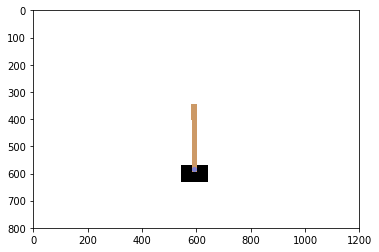

In [5]:
plt.imshow(env.render(mode='rgb_array'))

In [6]:
env.action_space # 2 possible actions: accelerate left (0) or accelerate right (1)

Discrete(2)

In [7]:
action = 1

In [8]:
obs, reward, done, info = env.step(action)

`obs[1]>0`: cart is moving right

`obs[2]>0`: pole is tilted right

`obs[3]<0` angular velocity is neg., likely pole will tilt left in next strp

In [13]:
obs

array([ 0.03241294,  0.18207924,  0.00302356, -0.29431775])

In [10]:
reward

1.0

In [11]:
done

False

In [12]:
info

{}

In [14]:
def policy(obs):
    """
    Accelerate left when pole is leaning toward the left, conversely when pole leans towards the right.
    """
    angle = obs[2]
    return 0 if angle < 0 else 1

In [ ]:
totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(1000):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)